## tf-idf

### 토큰화 확인

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./oliveyoung_review_tokenize03.csv")

In [3]:
df

,item_number,brand_name,sanitary_type,item_option,review_content,absorption_encoded,stimulation_encoded,texture_encoded,nouns
0,A000000191350,마리솜,pad,,너무 귀여워서 살수 밖에 없었어요 사실 쿠로미 가지고싶었는데 마멜 당첨 됬지만 너무...,3.0,2.0,3.0,"['귀엽', '살수', '밖', '없', '사실', '쿠로미', '마멜', '당첨'..."
1,A000000191350,마리솜,pad,,종류별로 다양하게 담겨있어서 좋아요 오버나이트가 급히 필요해서 뜯어 써봤는데 진짜...,2.0,3.0,2.0,"['종류', '다양', '좋', '오버나이트', '필요', '좋', '추천', '합..."
2,A000000193819,마리솜,pad,,조카가 얼마전에 생리시작해서 생리대 선물해 주려고했는데 마침 퍼스트박스 세트가 있어...,3.0,3.0,3.0,"['조카', '얼마', '전', '생리', '시작', '생리대', '선물', '퍼스..."
3,A000000191350,마리솜,pad,,아직 사용 전이에요 그래도 리뷰 남겨요 패키징 귀여워요 마이멜로디 기대했는데에 시나모롤툭,3.0,3.0,3.0,"['사용', '전', '리뷰', '패', '징', '귀엽', '마이멜로디', '기대..."
4,A000000191350,마리솜,pad,,박스상태 그냥 상자에 넣어서 보내버려서 택배오는동안 망가졌네요 뽁뽁이 해야할거같아...,2.0,2.0,2.0,"['박스', '상태', '상자', '택배', '동안', '뽁뽁이', '같', '이쁘..."
...,...,...,...,...,...,...,...,...,...
21987,A000000006723,유기농본,pad,,세일할때 처음 써보고 그 후에 자주 사고있어요 쓰고나면 확실히 이전꺼보다 사용감좋은...,3.0,3.0,3.0,"['세일', '때', '처음', '그 후', '이전', '사용', '감', '좋']"
21988,A000000006723,유기농본,pad,,넘무긴오버나이트만사놓는바람에적당한길이에얋은게필요했는데마침들른올리브영에서세일도하고있는...,2.0,2.0,2.0,[]
21989,A000000006723,유기농본,pad,,사용해 온 기간은 정말 오래되어서 그냥 자연스럽게 선택하는 제품입니다 특별히 나쁜 ...,3.0,3.0,3.0,"['사용', '기간', '자연', '선택', '제품', '나쁘', '없']"
21990,A000000006723,유기농본,pad,,너무좋아요 너무좋스버다 사용해보니 너무좋습니다,2.0,2.0,2.0,"['좋', '사용', '좋']"


In [4]:
df["brand_name"].nunique()

17

# 템포 길이!

In [6]:
len(df[df["brand_name"]=="템포"])

2795

In [7]:
df.iloc[0]["review_content"] 

'너무 귀여워서 살수 밖에 없었어요 사실 쿠로미 가지고싶었는데 마멜 당첨 됬지만 너무 귀여워요 마멜도 숨막히게 귀엽네요 그냥 똑같은 생리대지만 기분이 좋아요'

In [4]:
sentence_list = [
    "티읕컵 쓰다가 링 달린 걸로 사고 싶어서 페미사이클을 살까말까 고민하던 중 올영에서 발견하고 바로 구매 스몰 최대 용량이 27ml 이지만 실제 수용량은 최대 20ml 정도인 듯 티읕컵에 비해 얇고 말랑해서 확실히 더 쉽고 편해요 진짜 초심자용으로는 정말 대추천 처음 쓰면 이것도 신경쓰일 지 몰라도 티읕컵 쓰다가 쓰는 입장에서 이건 진짜 개꿀이다 싶을 정도로 쉽고 편해요 다만 개인적으로 용량이 좀 적어서 다음엔 라지를 사볼까 싶기도 해용 이건 고민 중 얇고 말랑하지만 실링도 잘 돼요 만약 실링이 잘 안 된다 싶으면 개인차 있을 수 있지만 찬물에 씻어서 순간적으로 경도 좀 높여주는 그나마 나은 듯 요 말랑한걸 따뜻한 물에 씻으면 더 말랑해져서 실링 더 어려워지는 것 같아요 뺄 때 링이니까 정말 특히 더 쉽고 편함 서투르면 링에 손가락 거는 것도 잘 안 될 수 있는데 저는 중지 링에 걸고 검지로 실링 풀면 너무 쉽고 편하게 잘 됐었어요  생리컵 도전해보고 싶은 초심자에게 정말 추천하고 싶은 제품",
    '너무 귀여워서 살수 밖에 없었어요 사실 쿠로미 가지고싶었는데 마멜 당첨 됬지만 너무 귀여워요 마멜도 숨막히게 귀엽네요 그냥 똑같은 생리대지만 기분이 좋아요'
]
   

In [3]:
from konlpy.tag import Komoran

komoran = Komoran(userdic="./user_final.dic")

In [10]:
# def tokenize(sentence):
#     tokens = komoran.pos(sentence)
#     nouns = [text for text, tag in tokens if tag in ("NNP", "NNG", "VA", "VCN", "MAG", "XR")]
#     return nouns

In [5]:
def tokenize(sentence):
    tokens = komoran.pos(sentence)
    nouns = [text for text, tag in tokens if tag in ("NNP", "NNG", "XR", "VA")]
    return nouns

In [102]:
# nouns_list = []
# for i in sentence_list:
#     for x in sentence_list[i]:
#         nouns_list.append(tokenize(x))

In [6]:
nouns_list = [tokenize(x) for x in sentence_list]

In [7]:
print(nouns_list)

[['티읕컵', '링', '사고', '고민', '올영', '발견', '구매', '스몰', '최대', '용량', '실제', '용량', '최대', '정도', '티읕컵', '얇', '말랑', '해서', '쉽', '편하', '초심자', '추천', '처음', '신경', '티읕컵', '입장', '이건', '개꿀', '이다', '정도', '쉽', '편하', '개인', '용량', '적', '다음', '라지', '해', '이건', '고민', '얇', '말랑', '실링', '실링', '개인차', '찬물', '순간', '경도', '말랑', '따뜻', '물', '말랑', '실링', '어렵', '같', '때', '링', '쉽', '편하', '서투르', '링', '손가락', '중지', '링', '검지', '실링', '쉽', '편하', '생리컵', '도전', '초심자', '추천', '제품'], ['귀엽', '살수', '밖', '없', '사실', '쿠로미', '마멜', '당첨', '귀엽', '마멜', '숨', '귀엽', '똑같', '생리대', '지만', '기분', '좋']]


In [105]:
target = "티읕컵"

In [106]:
from collections import Counter

counter_list = [Counter(x) for x in nouns_list]

In [107]:
print(counter_list)

[Counter({'링': 4, '말랑': 4, '쉽': 4, '편하': 4, '실링': 4, '티읕컵': 3, '용량': 3, '고민': 2, '최대': 2, '정도': 2, '얇': 2, '초심자': 2, '추천': 2, '이건': 2, '사고': 1, '올영': 1, '발견': 1, '구매': 1, '스몰': 1, '실제': 1, '해서': 1, '처음': 1, '신경': 1, '입장': 1, '개꿀': 1, '이다': 1, '개인': 1, '적': 1, '다음': 1, '라지': 1, '해': 1, '개인차': 1, '찬물': 1, '순간': 1, '경도': 1, '따뜻': 1, '물': 1, '어렵': 1, '같': 1, '때': 1, '서투르': 1, '손가락': 1, '중지': 1, '검지': 1, '생리컵': 1, '도전': 1, '제품': 1}), Counter({'귀엽': 3, '마멜': 2, '살수': 1, '밖': 1, '없': 1, '사실': 1, '쿠로미': 1, '당첨': 1, '숨': 1, '똑같': 1, '생리대': 1, '지만': 1, '기분': 1, '좋': 1})]


In [18]:
type(counter_list)

list

In [19]:
counter_list[0]["링"]

4

In [20]:
# marisom = marisom[:2]

In [21]:
counter_list[1]["오버나이트"]

0

In [22]:
target = "산리오"
cnt = 0
for i in range(len(counter_list)):
    if target in counter_list[i]:
        # print(counter_list[i], counter_list[i][target])
        cnt += counter_list[i][target]
print(cnt)

0


In [23]:
target = "산리오"
cnt = 0
for i in range(len(counter_list)):
    if target in counter_list[i]:
        cnt += counter_list[i][target]
print(cnt)

0


In [24]:
cup_name = df[(df["sanitary_type"]=="cup")][["brand_name"]].value_counts()

In [25]:
cup_name

brand_name
티읕            581
루나            336
라엘             21
해피문데이          12
한나              8
Name: count, dtype: int64

In [28]:
# df.loc[df['brand_name'] == '템폰', 'brand_name'] = '템포'

In [247]:
del tampon[1192]

In [77]:
# tempo

In [8]:
import numpy as np
df['review_content'] = df['review_content'].replace(np.nan, '', regex=True)

In [109]:
# pad = df[(df["brand_name"]=="좋은느낌") & (df["sanitary_type"]=="pad")]["review_content"].tolist()

In [308]:
df[df["sanitary_type"]=="pad"]["brand_name"].unique()

array(['마리솜', '좋은느낌', '라엘', '이너시아', '유기농본', '쏘피', '아임오', '라네이처', '예지미인'],
      dtype=object)

In [369]:
pad= df[(df["brand_name"]=="예지미인") & (df["sanitary_type"]=="pad")]["review_content"].tolist()

In [370]:
len(pad)

719

In [371]:
from collections import Counter

# Define the tokenize function
def tokenize(sentence):
    tokens = komoran.pos(sentence)
    nouns = [text for text, tag in tokens if tag in ("NNP", "NNG", "XR", "VA")]
    return nouns

# Your sentence list
sentence_list = pad

# Tokenize each sentence and store in a list
nouns_list = [tokenize(sentence) for sentence in sentence_list]

# Create a list of dictionaries with counters3
counter_list = [Counter(x) for x in nouns_list]

# Print the result
# for i, counters in enumerate(counter_list):
#     print(f"Counters for sentence {i + 1}:", counters)


# 브랜드별 특정 키워드 언급 횟수 집계

In [312]:
pad_target = ["나쁘", "좋", "흡수", "편한", "편하", "착용", "불편", "추천", "재구매",
              "가성비", "재질", "촉감", "유기농", "순면", "무표백", "트러블"]
cup_target = ["삽입", "불편", "좋", "편하", "편한", "압박", "눌림", "말랑", "재구매",
              "부드", "부드럽", "추천", "어렵", "어려", "쉽", "초보자", "입문자"]
tampon_target = ["편한", "편하", "어렵", "어려", "추천", "좋", "나쁘", "쉽", "편리", 
                 "초보자", "입문자", "아프", "재구매", "필수템", "부드럽", "자극", "흡수력", "흡수"]
  

In [372]:
len(counter_list)

719

In [373]:
target = pad_target
target_counts = {t: 0 for t in target}

for i in range(len(counter_list)):
    for t in target:
        target_counts[t] += counter_list[i][t]
print("Brand: 예지미인 - pad")
for t, count in target_counts.items():
    print(f"{t}: {count / len(counter_list):.2f}")


Brand: 예지미인 - pad
나쁘: 0.02
좋: 0.77
흡수: 0.12
편한: 0.00
편하: 0.08
착용: 0.02
불편: 0.03
추천: 0.05
재구매: 0.06
가성비: 0.03
재질: 0.00
촉감: 0.05
유기농: 0.15
순면: 0.13
무표백: 0.00
트러블: 0.01


In [315]:
# 패드형 values_list
values_list = []

In [252]:
# # 탐폰형 values_list
tampon_values_list = []

In [205]:
# # 컵형 values_list
# cup_values_list = []

In [375]:
len(values_list)

9

In [177]:
# del values_list[0]

In [24]:
import matplotlib.pyplot as plt

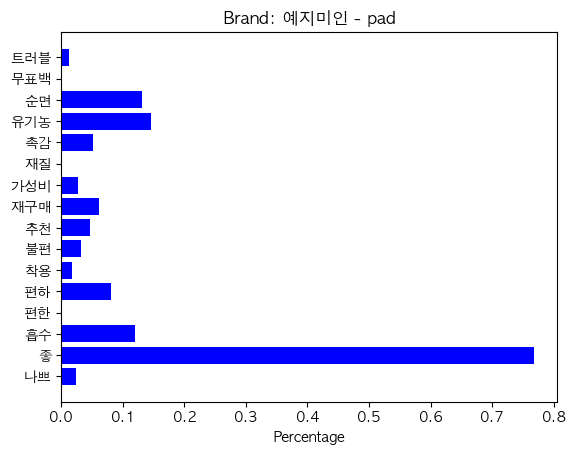

In [374]:
categories = list(target_counts.keys())
values = [(count / len(counter_list)) for t, count in target_counts.items()]
values_list.append(values)

plt.rc("font", family="AppleGothic")
plt.barh(categories, values, color='blue')
plt.xlabel('Percentage')
plt.title('Brand: 예지미인 - pad')
plt.show()


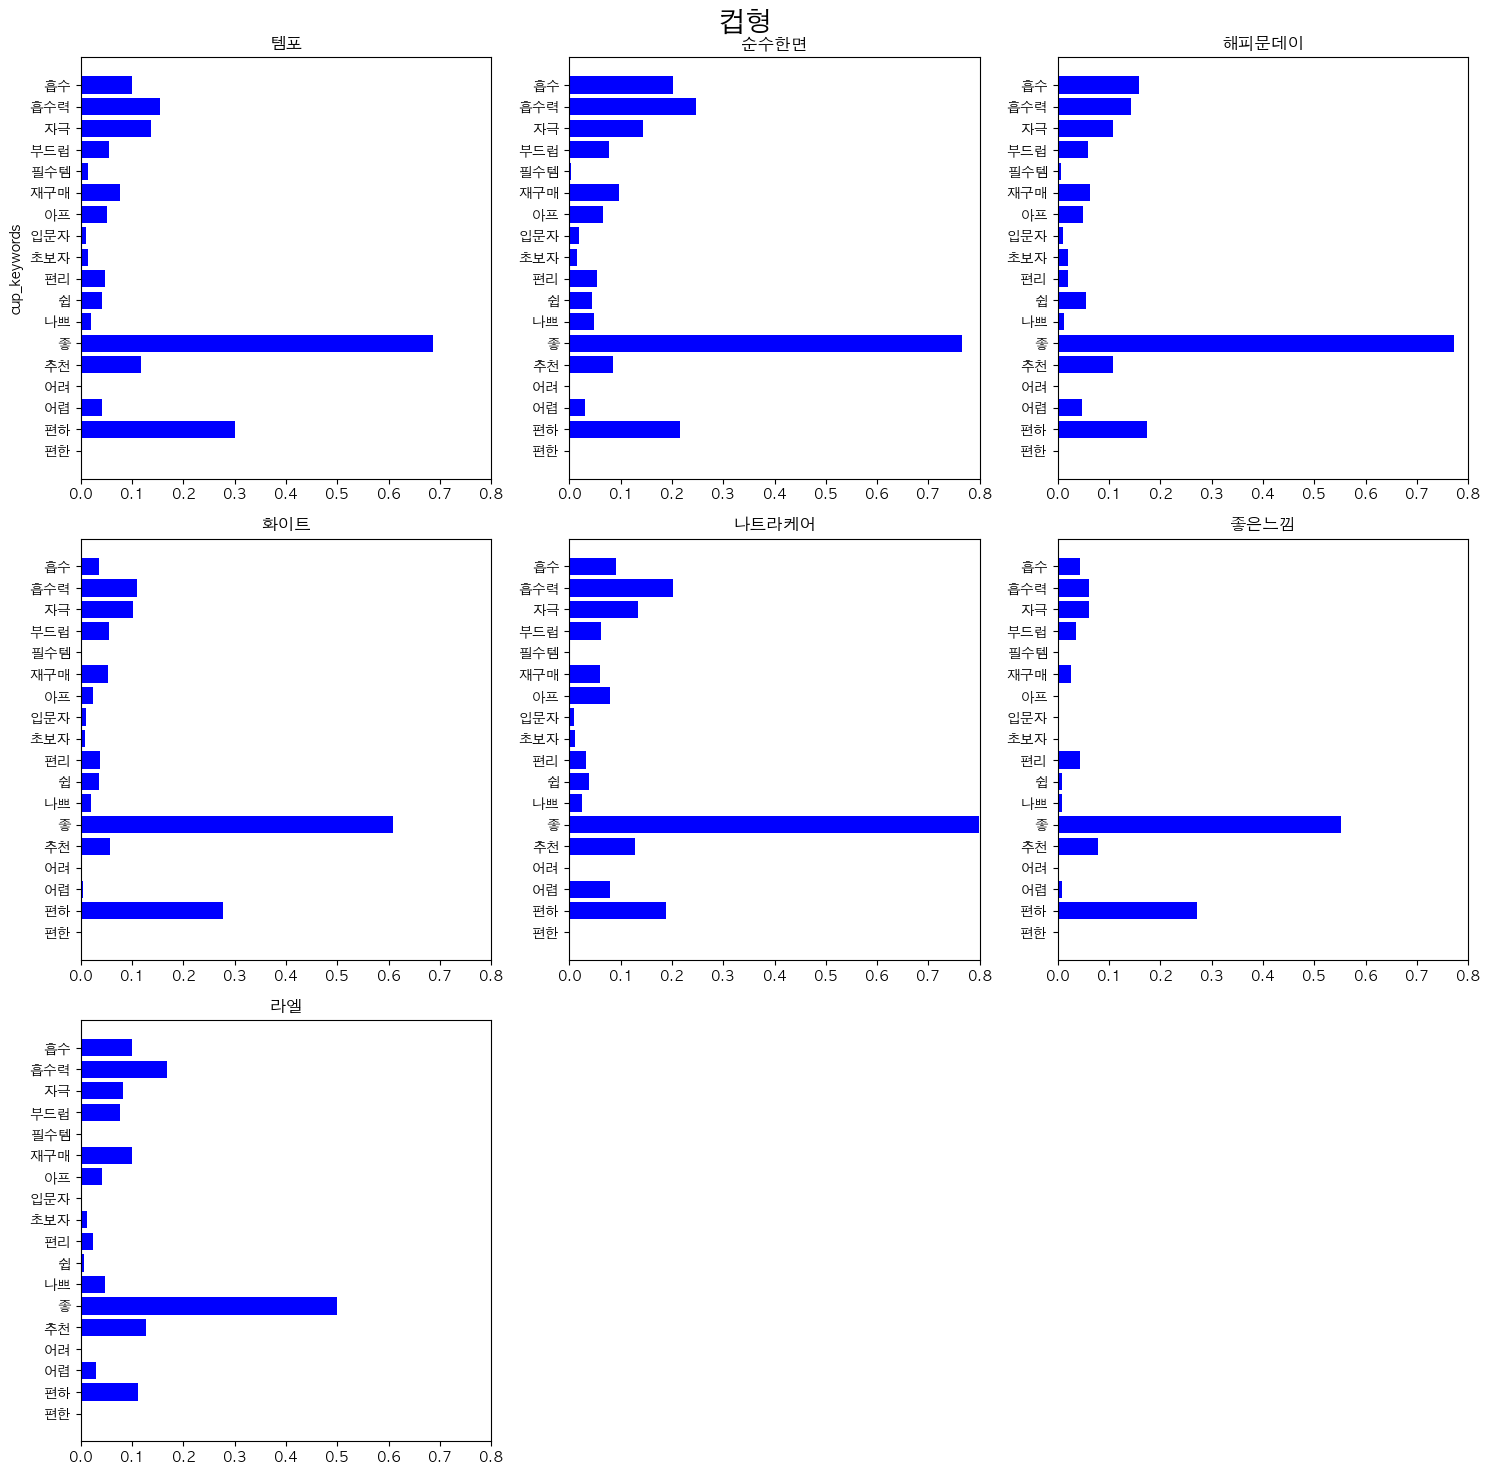

In [298]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))

plt.subplot(3, 3, 1)
plt.rc("font", family="AppleGothic")
plt.barh(categories, tampon_values_list[0], color='blue')
plt.xlim(0, 0.8)
plt.title('템포')
plt.ylabel('cup_keywords')

plt.subplot(3, 3, 2)
plt.rc("font", family="AppleGothic")
plt.barh(categories, tampon_values_list[1], color='blue')
plt.xlim(0, 0.8)
plt.title('순수한면')

plt.subplot(3, 3, 3)
plt.rc("font", family="AppleGothic")
plt.barh(categories, tampon_values_list[2], color='blue')
plt.xlim(0, 0.8)
plt.title('해피문데이')

plt.subplot(3, 3, 4)
plt.rc("font", family="AppleGothic")
plt.barh(categories, tampon_values_list[3], color='blue')
plt.xlim(0, 0.8)
plt.title('화이트')

plt.subplot(3, 3, 5)
plt.rc("font", family="AppleGothic")
plt.barh(categories, tampon_values_list[4], color='blue')
plt.xlim(0, 0.8)
plt.title('나트라케어')

plt.subplot(3, 3, 6)
plt.rc("font", family="AppleGothic")
plt.barh(categories, tampon_values_list[5], color='blue')
plt.xlim(0, 0.8)
plt.title('좋은느낌')

plt.subplot(3, 3, 7)
plt.rc("font", family="AppleGothic")
plt.barh(categories, tampon_values_list[6], color='blue')
plt.xlim(0, 0.8)

plt.title('라엘')

# 전체 그래프의 제목 설정
plt.suptitle('컵형', fontsize=20)
plt.tight_layout()
plt.show()

In [306]:
for i in range(len(tampon_values_list)):
    print(tampon_values_list[i][2] + tampon_values_list[i][3])

0.041159627773801
0.02952755905511811
0.04670599803343166
0.0031496062992125984
0.07988165680473373
0.008771929824561403
0.029069767441860465


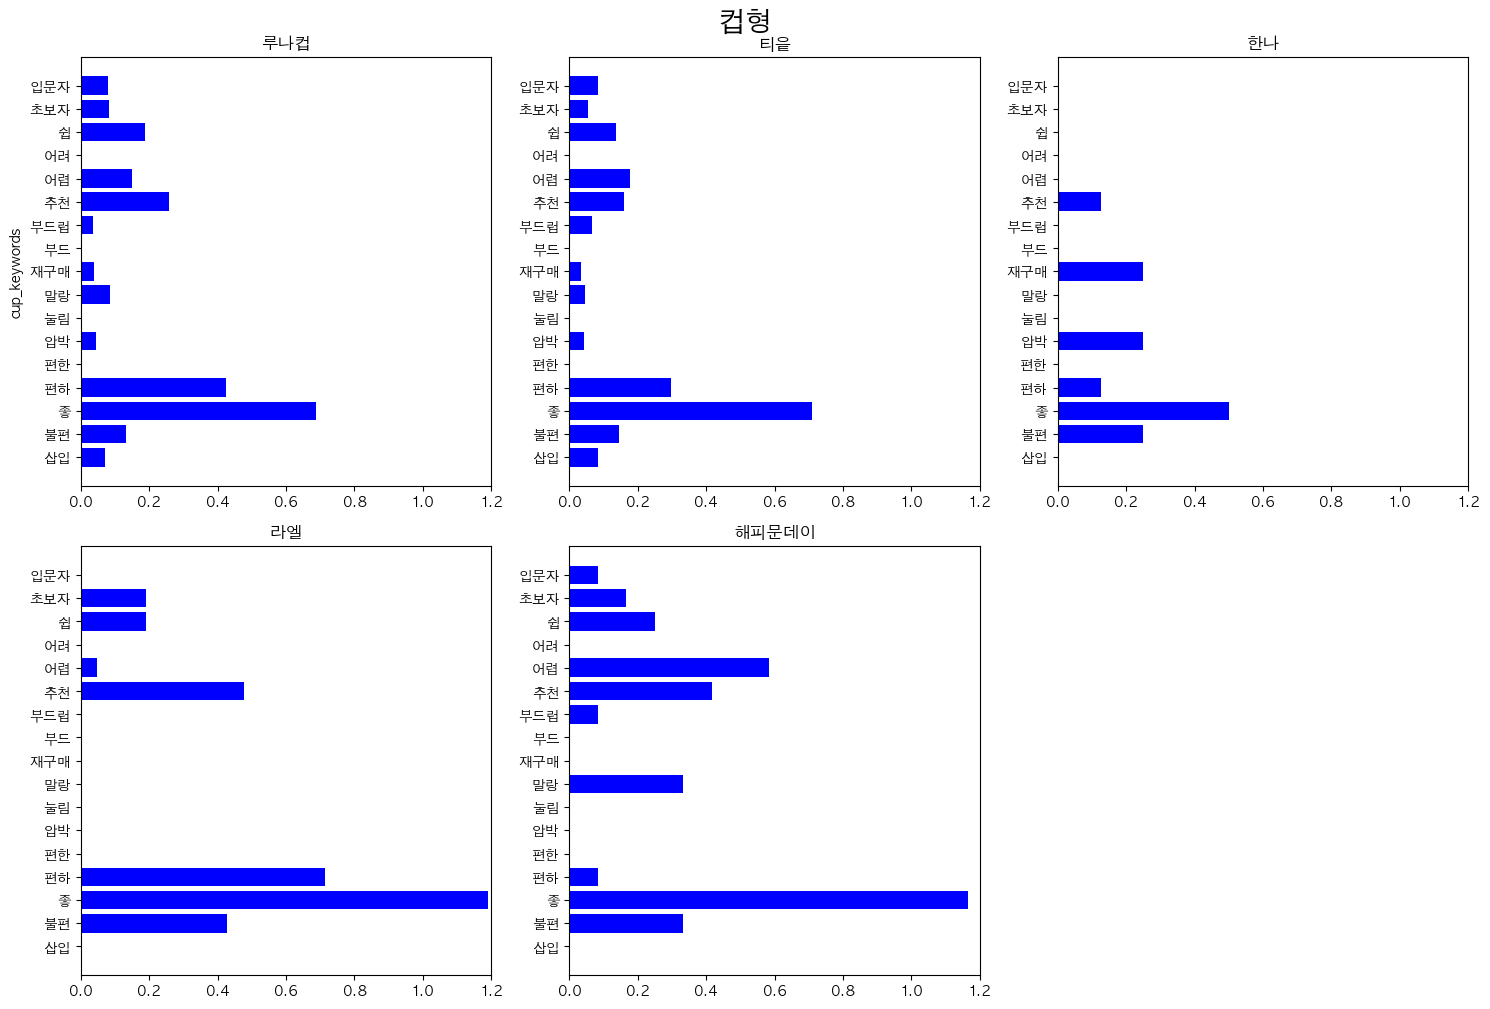

In [234]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))

plt.subplot(3, 3, 1)
plt.rc("font", family="AppleGothic")
plt.barh(categories, cup_values_list[0], color='blue')
plt.xlim(0, 1.2)
plt.title('루나컵')
plt.ylabel('cup_keywords')

plt.subplot(3, 3, 2)
plt.rc("font", family="AppleGothic")
plt.barh(categories, cup_values_list[1], color='blue')
plt.xlim(0, 1.2)
plt.title('티읕')

plt.subplot(3, 3, 3)
plt.rc("font", family="AppleGothic")
plt.barh(categories, cup_values_list[2], color='blue')
plt.xlim(0, 1.2)
plt.title('한나')

plt.subplot(3, 3, 4)
plt.rc("font", family="AppleGothic")
plt.barh(categories, cup_values_list[3], color='blue')
plt.xlim(0, 1.2)
plt.title('라엘')

plt.subplot(3, 3, 5)
plt.rc("font", family="AppleGothic")
plt.barh(categories, cup_values_list[4], color='blue')
plt.xlim(0, 1.2)
plt.title('해피문데이')

# 전체 그래프의 제목 설정
plt.suptitle('컵형', fontsize=20)
plt.tight_layout()
plt.show()

In [241]:
for i in range(len(cup_values_list)):
    print(cup_values_list[i][2])

0.6875
0.7108433734939759
0.5
1.1904761904761905
1.1666666666666667


In [382]:
print(cup_target)

['삽입', '불편', '좋', '편하', '편한', '압박', '눌림', '말랑', '재구매', '부드', '부드럽', '추천', '어렵', '어려', '쉽', '초보자', '입문자']


In [386]:
for i in range(len(cup_values_list)):
    print(cup_values_list[i][8])

0.03869047619047619
0.03442340791738382
0.25
0.0
0.0


In [388]:
for i in range(len(cup_values_list)):
    print(cup_values_list[i][-4] + cup_values_list[i][-5])

0.1488095238095238
0.17728055077452667
0.0
0.047619047619047616
0.5833333333333334


In [121]:
## 내림차순 정렬
# target = cup_target
# target_counts = {t: 0 for t in target}

# for i in range(len(counter_list)):
#     for t in target:
#         if t in counter_list[i]:
#             target_counts[t] += counter_list[i][t]

# print("Brand: 마리솜 - pad")
# sorted_targets = sorted(target_counts.items(), key=lambda x: x[1], reverse=True)
# for t, count in sorted_targets:
#     print(f"{t}: {count / len(counter_list):.2%}")


In [204]:
sort_target_counts = sorted(target_counts.items(), key=lambda x: x[1], reverse=True)
sort_target_counts[:5]

[('좋', 25), ('편하', 15), ('추천', 10), ('불편', 9), ('쉽', 4)]

In [200]:
target_counts

{'삽입': 0,
 '불편': 9,
 '좋': 25,
 '편하': 15,
 '편한': 0,
 '압박': 0,
 '눌림': 0,
 '말랑': 0,
 '재구매': 0,
 '부드': 0,
 '부드럽': 0,
 '추천': 10,
 '어렵': 1,
 '어려': 0,
 '쉽': 4,
 '초보자': 4,
 '입문자': 0}

- pad: 좋은느낌, 쏘피, 유기농본, 라엘, 이너시아, 예지미인, 라네이처, 마리솜, 아임오
- cup: 티읕, 루나, 라엘, 해피문데이, 한나
- tampon: 템포, 해피문데이, 순수한면, 화이트, 나트라케어, 라엘, 좋은느낌

In [233]:
cup_review = df[df["sanitary_type"]=="cup"]["review_content"]
cup_review

11819    원래는 루나컵 링 라지 사려고 했었는데 품절되서 링 스몰 사이즈로 구매했는데  경도...
11820    쇼티 타이니 쓰다가 조금 더 크고 쉽게 빼고 싶어서 링 스몰로 재구매했는데 좋네요 ...
11821    다른 컵은 써보질 않아서 모루겠지만 웬만하면 이거보다 작은 타이니 구입하시길 추천드...
11822    인생컵 골든컵 진짜 이거 쓰고 삶의 질이 달라짐 나는 말랑한게 잘 맞는 타입이었음 ...
11823    일단 엉덩이에 평화가 옵니다 그날이 더이상 무삽지 않아요 또한 링으로 되어 있어서 ...
                               ...                        
12772    생리컵은 사용한 지 몇 년 됐는데 화장실 칸 안에 세면대 있는 환경이 아니면 비우기...
12773    저는 생리컵을 사용하고 있던 터라 이 제품이 체험단에 나온 게 참 반갑더라구요 루 ...
12774    기존에 사용중이던 생리컵 갈아줘야될거같아서 신청했어요 사이즈 딱 좋고 초보자도 사용...
12775    생리컵 디스크형이 첫 도전이었는데 물컹거리는게 좀 힘들어서 신청했어요 미디움이라 초...
12776    몇 년 만에 다시 생리컵 사용하는거라 조금 걱정했는데 부드럽고 용량도 넉넉해서 만족...
Name: review_content, Length: 958, dtype: object

In [236]:
cup_review.iloc[0]

'원래는 루나컵 링 라지 사려고 했었는데 품절되서 링 스몰 사이즈로 구매했는데  경도도 딱 말랑탱탱 하고 써보니까 안에서 잘 펴지고 정말 아무것도 안한것처럼 방광압박도 없고  편하네요  참고로 넣을때는 리비아 폴드나 c폴드 사용하는데 그게 제일 잘 펴짐 오히려 기존에 써왔던 탐폰보다도 편한듯 다음엔 라지 사이즈도 구매하고 싶네요 양 많은날엔 스몰보다 라지 사이즈가 적합한듯  양 많은날은 스몰 쓰면 자주 비워줘야 해서 번거롭기도 사람에 따라 다르겠지만 양 많은날엔 생각보다 혈이 금방 차더라고요    생리컵은 앞으로도 계속 폐경 올 때까지 몇십년동안 쭉 사용하게 될 거 같습니다 그리고 고리가 있어서 뺄 때 수월하고요  입문자분들한텐  꼬리 달린것보다 고리형이 제일 나은거  같아욥  루나컵 링이 입문자들한테 제일 무난하고 경도도 말랑하고 탄성도 좋아서 쓰기 편할거 같네요 티읕컵 같은 좀 하드한 제품은 첨에 넣을때도 힘들고 뺄 때도 실링 풀기가 힘들어서 저한테는 꺼려지더라고요  그리고 저는 생리컵 뺄때는 밑으로 힘줘서 빼내지 않고 손가락으로만 이용해서 빼내는데 지속적으로 대변볼때 힘주듯이  골반저근육에 힘줘서 무 뽑듯 잡아 빼내면 그 압력 때문에  자궁탈장 골반장기탈출증 이란 부작용도 있어서 안 좋다고 하네요  생리컵으로 인해 자궁하수가 생길 수 있다니 무섭 뺄 때는 최대한 손가락으로만 이용해서  생리컵 꾹 눌러서 실링 제대로 풀고  비틀면서 살살 빼내야 해요 생리컵 처음 쓰시는 분 들 참고하시길'

In [196]:
# 문자열 아닌 데이터 모두 제거
cup_review = [review for review in cup_review if type(review) is str]
cup_review

['원래는 루나컵 링 라지 사려고 했었는데 품절되서 링 스몰 사이즈로 구매했는데  경도도 딱 말랑탱탱 하고 써보니까 안에서 잘 펴지고 정말 아무것도 안한것처럼 방광압박도 없고  편하네요  참고로 넣을때는 리비아 폴드나 c폴드 사용하는데 그게 제일 잘 펴짐 오히려 기존에 써왔던 탐폰보다도 편한듯 다음엔 라지 사이즈도 구매하고 싶네요 양 많은날엔 스몰보다 라지 사이즈가 적합한듯  양 많은날은 스몰 쓰면 자주 비워줘야 해서 번거롭기도 사람에 따라 다르겠지만 양 많은날엔 생각보다 혈이 금방 차더라고요    생리컵은 앞으로도 계속 폐경 올 때까지 몇십년동안 쭉 사용하게 될 거 같습니다 그리고 고리가 있어서 뺄 때 수월하고요  입문자분들한텐  꼬리 달린것보다 고리형이 제일 나은거  같아욥  루나컵 링이 입문자들한테 제일 무난하고 경도도 말랑하고 탄성도 좋아서 쓰기 편할거 같네요 티읕컵 같은 좀 하드한 제품은 첨에 넣을때도 힘들고 뺄 때도 실링 풀기가 힘들어서 저한테는 꺼려지더라고요  그리고 저는 생리컵 뺄때는 밑으로 힘줘서 빼내지 않고 손가락으로만 이용해서 빼내는데 지속적으로 대변볼때 힘주듯이  골반저근육에 힘줘서 무 뽑듯 잡아 빼내면 그 압력 때문에  자궁탈장 골반장기탈출증 이란 부작용도 있어서 안 좋다고 하네요  생리컵으로 인해 자궁하수가 생길 수 있다니 무섭 뺄 때는 최대한 손가락으로만 이용해서  생리컵 꾹 눌러서 실링 제대로 풀고  비틀면서 살살 빼내야 해요 생리컵 처음 쓰시는 분 들 참고하시길',
 '쇼티 타이니 쓰다가 조금 더 크고 쉽게 빼고 싶어서 링 스몰로 재구매했는데 좋네요 양에 따라 같이 사용해야겠어요',
 '다른 컵은 써보질 않아서 모루겠지만 웬만하면 이거보다 작은 타이니 구입하시길 추천드려용 타이니용량으로 충분한 것 같아요',
 '인생컵 골든컵 진짜 이거 쓰고 삶의 질이 달라짐 나는 말랑한게 잘 맞는 타입이었음 컵이 말랑해서 컵 비울때 그냥 고리에 손가락 걸고 잡아당기면서 질에 힘줘서 누르면 실링 풀림 진짜 링타입 신세계 근데 스몰 용량 작아서 1일

In [84]:
# from wordcloud import WordCloud
# import matplotlib.pyplot as plt

# # Review text
# review = cup_review.iloc[0]

# # Tokenization with komoran
# tokens = komoran.pos(review)
# nouns = [text for text, tag in tokens if tag in ("NNP", "NNG", "XR", "VA")]

# # Stop words to exclude
# stop_words = ["빼내", "생리컵", "참고로", "경도도", "안에서", "하수가", "생기", "듯이", "자궁하수가", "무섭", "꺼려지더라고요", "때"]

# # Exclude stop words
# filtered_nouns = [word for word in nouns if word not in stop_words]

# # Create a string from the filtered nouns
# filtered_text = ' '.join(filtered_nouns)

# # Generate a word cloud
# wordcloud = WordCloud('/Users/oyujeong/Library/Fonts/NanumSquareNeoOTF-Bd.otf', width=800, height=400, background_color='white').generate(filtered_text)

# # Plot the WordCloud image
# plt.figure(figsize=(10, 5))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.show()


In [247]:
# Stop words to exclude
stop_words = ["잘", "너무", "많", "폴", "참고로", "수월", "생리컵", "컵", "스모", "나은", "아무것"]

# Exclude stop words
filtered_nouns = [word for word in nouns if word not in stop_words]

# Create a string from the filtered nouns
filtered_text = ' '.join(filtered_nouns)

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

In [6]:
from tqdm import tqdm

tqdm.pandas()
df["nouns"] = df["nouns"].progress_apply(lambda x: eval(x))

100%|██████████████████████████████████████████████████████████████████████████| 21992/21992 [00:00<00:00, 47703.34it/s]


In [44]:
df[df["sanitary_type"]=="cup"]["brand_name"].unique()

array(['루나', '티읕', '한나', '라엘', '해피문데이'], dtype=object)

In [89]:
nouns_list = df[(df["sanitary_type"]=="cup") & (df["brand_name"]=="해피문데이")]["nouns"]

In [90]:
nouns_list

12765    [생리컵, 사용, 교체, 해피문데이, 밖, 생리컵, 갈기, 불편, 집, 때, 때, ...
12766    [적당, 단단, 안, 요, 탐폰, 다, 시작, 타입, 이예, 낮, 자궁, 사이즈, ...
12767    [체험, 단, 후기, 작성, 기간, 생리, 시작, 손, 강도, 말랑, 생리컵, 항아...
12768    [생리대, 불편, 다양, 종류, 제품, 생각, 차, 생리컵, 체험, 단, 사용, 딱...
12769    [이번, 체험, 단, 기회, 해피문데이, 생리컵, 사실, 생리컵, 사, 용해, 본적...
12770    [탐폰, 사용, 생리컵, 초심자, 탐폰, 해피문데이, 리뷰, 내역, 증명, 생리, ...
12771    [솔직, 리뷰, 올영, 체험, 단, 리뷰, 올영, 체험, 단, 제품, 제공, 사용,...
12772    [생리컵, 사용, 화장실, 칸, 안, 세면대, 환경, 힘들, 완전, 만족, 사용, ...
12773    [생리컵, 사용, 제품, 체험, 단, 게, 반갑, 루, 티, 컵, 이렇, 종류, 해...
12774    [기존, 사용, 생리컵, 같, 신청, 사이즈, 좋, 초보자, 사용, 좋, 제품, 같...
12775    [생리컵, 디스크, 도전, 물컹, 거리, 힘들, 신청, 미디움, 초심자, 양, 많,...
12776                       [생리컵, 사용, 걱정, 부드럽, 용량, 넉넉, 만족]
Name: nouns, dtype: object

In [91]:
result_list = sum(nouns_list, [])
# print(result_list)

In [92]:
# tags

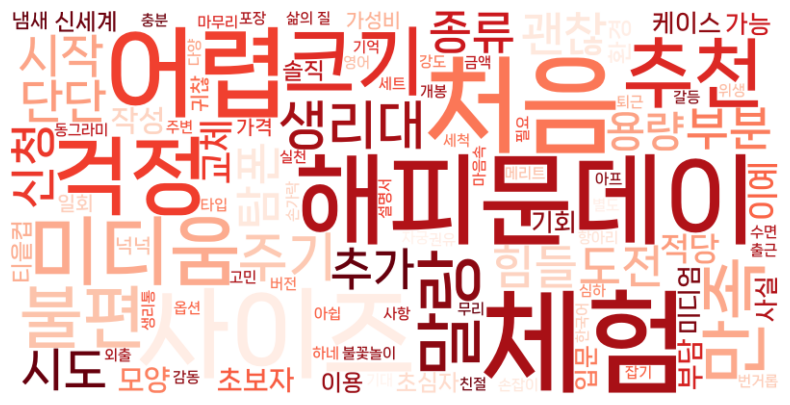

In [95]:
# 생리대 타입별 불용어
# stop_words = ["너무", "참고로", "수월", "생리컵", "컵", "스모", "나은", "아무것", "브영", "원래", "그렇", 
#               "생리대", "탐폰", "행사", "제가", "이건", "앞으로","올영", "사용", "제품", "구매", "양이",
#               "리뷰", "물감", "다음", "다르", "이렇", "마음", "어떻", "사실", "조금", "그런지", "사람", "사서",
#               "일차", "이랑", "비교", "기존", "일반", "이번"]

# 브랜드별(탐폰형) 불용어
# stop_words = ["구입", "괜찮", "그렇", "물감", "사서", "올영", "올리브영", "제가", "쓰기", "이번", "그런지",
#              "사실", "경우", "이건", "이랑", "비교", "일차", "원래", "이상", "이렇", "사람", "리뷰", "후기",
#              "제일", "이후", "급하", "다르", "마음", "이용", "앞으로", "타사", "다음", "주문", "커서", "동안",
#              "기존", "자체", "의사", "사면", "완전", "필요", "일반", "정도", "타제품", "건지", "할거", "부분",
#              "케이", "해서", "안함", "요즘", "구매", "어떻", "양이", "하진"]

# 브랜드별(패드형) 불용어
# stop_words = ["요즘", "이번", "라보", "이렇", "원래", "리뷰", "콜라", "살수", "사실", "할거", "지만", "그렇", "제가", "이건", "완전",
#              "이예", "정도", "올영", "올리브영", "사서", "경우", "오늘", "이상", "면도", "이랑", "그런지", "이후", "비교", "생리대",
#              "제일", "보니", "앞으로", "양이", "제품", "덜하", "대가", "라고", "자체", "의사", "보셀", "라베", "르프", "동안", "구매", "심하",
#              "다음", "이것저것", "사면", "주변", "미피", "중인", "있다", "드림", "의향", "세기", "전반", "사고", "해소", "예전", "동일", 
#              "관련", "대비", "인줄", "오가", ]

# 브랜드별(컵형) 불용어
stop_words = ["올리브영", "올영", "이랑", "일차", "기존", "어떻", "그렇", "리뷰", "이번", "물감", "생리컵", "자체", "이건", "원래", "양이", "한번",
             "제가", "이렇", "그런지", "완전", "생리", "월경", "타이", "사람", "정도", "생각", "레나", "기간", "비교", "시간", "보니", "건지",
             "다음", "다르", "이틀", "느낌", "구매", "사용", "평소", "구입", "제품", "후기", "제일", "양도", "상품", "와중", "거도", "송상",
             "머리카락", "라고", "차지", "절대", "예전", "해보면", "이상", "이전", "용해","본적", "딱 주", "갈기", "동안", "이다"]

filtered_nouns = [word for word in result_list if word not in stop_words and len(word) > 1]
counts = Counter(filtered_nouns)
tags = counts.most_common(100)

wordcloud = WordCloud(
    # 폰트 설정
    font_path = '/Users/oyujeong/Library/Fonts/NanumSquareNeoOTF-Bd.otf',
    width=800, 
    height=400, 
    background_color='white',
    colormap="Reds"
).generate_from_frequencies(dict(tags))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## tf-idf vectorizor

In [71]:
df[["review_content", "nouns"]]

,review_content,nouns
0,너무 귀여워서 살수 밖에 없었어요 사실 쿠로미 가지고싶었는데 마멜 당첨 됬지만 너무...,"['귀엽', '살수', '밖', '없', '사실', '쿠로미', '마멜', '당첨'..."
1,종류별로 다양하게 담겨있어서 좋아요 오버나이트가 급히 필요해서 뜯어 써봤는데 진짜...,"['종류', '다양', '좋', '오버나이트', '필요', '좋', '추천', '합..."
2,조카가 얼마전에 생리시작해서 생리대 선물해 주려고했는데 마침 퍼스트박스 세트가 있어...,"['조카', '얼마', '전', '생리', '시작', '생리대', '선물', '퍼스..."
3,아직 사용 전이에요 그래도 리뷰 남겨요 패키징 귀여워요 마이멜로디 기대했는데에 시나모롤툭,"['사용', '전', '리뷰', '패', '징', '귀엽', '마이멜로디', '기대..."
4,박스상태 그냥 상자에 넣어서 보내버려서 택배오는동안 망가졌네요 뽁뽁이 해야할거같아...,"['박스', '상태', '상자', '택배', '동안', '뽁뽁이', '같', '이쁘..."
...,...,...
21987,세일할때 처음 써보고 그 후에 자주 사고있어요 쓰고나면 확실히 이전꺼보다 사용감좋은...,"['세일', '때', '처음', '그 후', '이전', '사용', '감', '좋']"
21988,넘무긴오버나이트만사놓는바람에적당한길이에얋은게필요했는데마침들른올리브영에서세일도하고있는...,[]
21989,사용해 온 기간은 정말 오래되어서 그냥 자연스럽게 선택하는 제품입니다 특별히 나쁜 ...,"['사용', '기간', '자연', '선택', '제품', '나쁘', '없']"
21990,너무좋아요 너무좋스버다 사용해보니 너무좋습니다,"['좋', '사용', '좋']"


In [72]:
# 토큰화한 데이터에서 명사만 집계하기

In [73]:
from tqdm import tqdm

tqdm.pandas()
df["nouns"] = df["nouns"].progress_apply(lambda x: eval(x))

100%|██████████████████████████████████████████████████████████████████████████| 21992/21992 [00:00<00:00, 34646.93it/s]


In [74]:
# TfidfVectorizer 사용

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer

def dummy_func(doc):
    return doc

tfidf = TfidfVectorizer(
    analyzer = "word",
    tokenizer = dummy_func,
    preprocessor = dummy_func,
    token_pattern = None
)

In [76]:
# 명사 리스트만 전달하여 tf-idf vectorizor 학습시키시

In [77]:
tfidf_csr_matrix = tfidf.fit_transform(df["nouns"])

In [78]:
tfidf_csr_matrix

<21992x6507 sparse matrix of type '<class 'numpy.float64'>'
	with 319780 stored elements in Compressed Sparse Row format>

In [79]:
tfidf_vector_list = tfidf_csr_matrix.toarray()

In [80]:
sample = tfidf_vector_list[0]
print("0인 원소 개수", len(sample[sample == 0]))
print("0이 아닌 원소 개수", len(sample[sample > 0]))

0인 원소 개수 6493
0이 아닌 원소 개수 14


In [81]:
print(df.iloc[0]["nouns"])
print(tfidf_csr_matrix[0])

['귀엽', '살수', '밖', '없', '사실', '쿠로미', '마멜', '당첨', '귀엽', '마멜', '숨', '귀엽', '똑같', '생리대', '지만', '기분', '좋']
  (0, 5012)	0.05475209996612039
  (0, 785)	0.18067150019543077
  (0, 5152)	0.24216519211391588
  (0, 2866)	0.08453615204059034
  (0, 1536)	0.2315597926639707
  (0, 3209)	0.2762277693371008
  (0, 1230)	0.23863044753500928
  (0, 1734)	0.5169752811193168
  (0, 5616)	0.23441578575683905
  (0, 2697)	0.16994962770545782
  (0, 3717)	0.08155361852401934
  (0, 2135)	0.18088325905610356
  (0, 2774)	0.24899661518554358
  (0, 681)	0.5091535410248555


## tf-idf 사용해 문자 벡터화

In [82]:
from konlpy.tag import Komoran

komoran = Komoran(userdic="./user_final.dic")

In [83]:
# def tokenize(sentence):
#     tokens = komoran.pos(sentence)
#     nouns = [text for text, tag in tokens if tag in ("NNP", "NNG", "VA", "VCN", "MAG", "XR")]
#     return nouns

In [84]:
def tokenize(sentence):
    tokens = komoran.pos(sentence)
    nouns = [text for text, tag in tokens if tag in ("NNP", "NNG", "XR", "VA")]
    return nouns

In [95]:
query = "양이 많을 때 쓰기 좋은 생리대 원해요"

In [96]:
nouns = tokenize(query)

In [97]:
nouns

['양이', '많', '때', '쓰기', '좋', '생리대']

In [98]:
query_csr_matrix = tfidf.transform([nouns])

In [99]:
vocab = tfidf.vocabulary_

In [100]:
for noun in nouns:
    try:
        print(noun, vocab[noun])
    except:
        continue

양이 3643
많 1795
때 1529
쓰기 3437
좋 5012
생리대 2866


In [101]:
print(query_csr_matrix)

  (0, 5012)	0.2143736776629576
  (0, 3643)	0.45995650945799016
  (0, 3437)	0.6291321062018265
  (0, 2866)	0.33098868937684683
  (0, 1795)	0.389509943539918
  (0, 1529)	0.29224171513776215


## 검색 쿼리 벡터화

In [102]:
from sklearn.metrics.pairwise import cosine_similarity

In [103]:
def search(query):
    query_nouns = tokenize(query)
    query_tfidf = tfidf.transform([query_nouns])
    similarities = cosine_similarity(query_tfidf, tfidf_csr_matrix).flatten()
    top_similarities = sorted(similarities, reverse=True)[:5]        # similarities 높은거 5개만
    top_indices = similarities.argsort()[-5:][::-1]                  # top5의 인덱스 넘버 추출
    top_brands = [df.iloc[i]["brand_name"] for i in top_indices]          # top5의 아이템 추출
    top_items = [df.iloc[i]["item_option"] for i in top_indices] 
    for similarity, brand, item in zip(top_similarities, top_brands, top_items):
        print(similarity, brand, item)


In [104]:
search(query)
# 총 데이터에 대한 벡터들 -> 코사인 유사도 측정 -> 0 제외하고 뽑기

0.7723964858291668 템포 템포 슈퍼 10P
0.6388186889569398 좋은느낌 좋은순면 수퍼롱10P
0.6028877960428402 좋은느낌 좋은순면 울날대16P
0.5926068914317497 유기농본  
0.5875482258113085 좋은느낌 입는오버나이트 중형4


어라..?.? 결과가 잘 안 나오네..?.?